In [3]:
import data_frame
import models
import importlib
import evaluator as ev

In [2]:
filePath = "../KiDS-DR5-WCScut_x_DESI-DR1-small.fits"
df = data_frame.DataFrame(filePath, "QSO", data_frame.MaxFiller())

In [8]:
df.data["MAG_GAAP_r"]

0          20.716307
1          21.481810
14         20.920393
23         22.640545
49         20.336668
             ...    
2649220    22.916708
2649223    21.824081
2649230    20.658283
2649258    23.034378
2649270    21.782635
Name: MAG_GAAP_r, Length: 157849, dtype: float32

In [4]:
model = models.MLModelContext(strategy=models.ANNSingleGauss(df))
model.train()
model.test_predict()

2025-07-11 11:04:03.748892: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_INVALID_DEVICE: invalid device ordinal
2025-07-11 11:04:03.748919: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:178] verbose logging is disabled. Rerun with verbose logging (usually --v=1 or --vmodule=cuda_diagnostics=1) to get more diagnostic output from this module
2025-07-11 11:04:03.748923: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:183] retrieving CUDA diagnostic information for host: borsuk
2025-07-11 11:04:03.748925: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:190] hostname: borsuk
2025-07-11 11:04:03.749022: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:197] libcuda reported version is: 570.133.7
2025-07-11 11:04:03.749072: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:201] kernel reported version is: 5

Epoch 61: early stopping
Restoring model weights from the end of the best epoch: 31.


/home/kdrabicki/projekt/models.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.525489  1.4044764 1.9215112 ... 1.8113257 3.139529  2.40724  ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  self.dataFrame.data.loc[indexes, "Z_pred"] = y_hat
/home/kdrabicki/projekt/models.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.06026145 0.25102404 0.06665853 ... 0.12477095 0.18653004 0.2698568 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  self.dataFrame.data.loc[indexes, "Z_pred_std"] = y_std


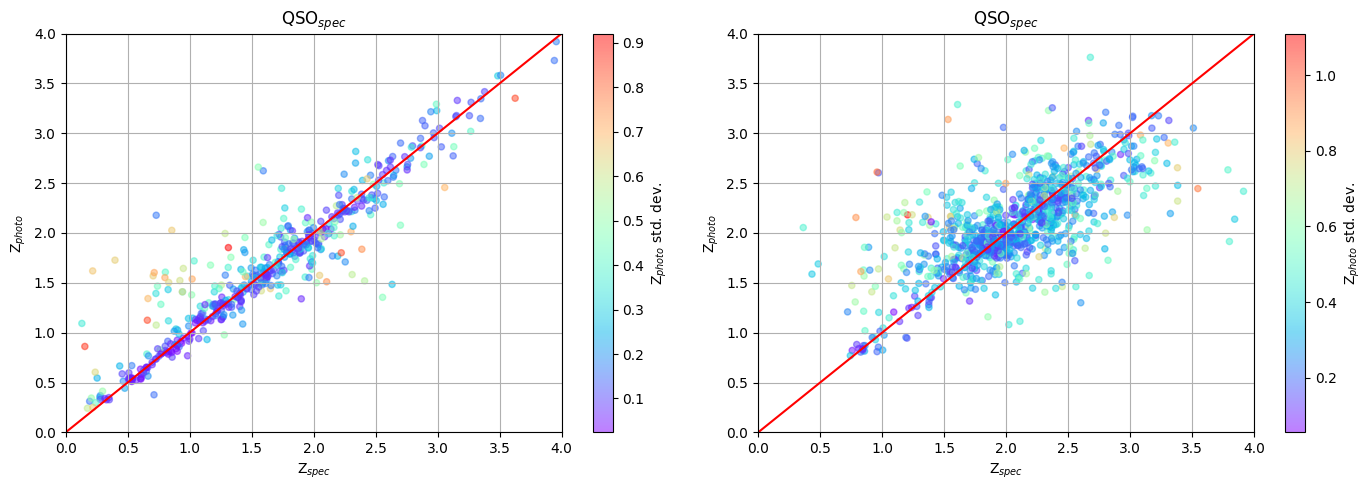

,MSE,R^2,Redshift error
test,0.095436,0.829713,"(0.01813388101760226, 0.13824430761224463)"
faint,0.221884,0.350006,"(0.020887347224481476, 0.17580039740495956)"


In [5]:
importlib.reload(ev)
evaluator = ev.Evaluator(df)
evaluator.redshift_with_std_plot()
evaluator.evaluate_metrics()